# Building the ARIMA model using  auto_ARIMA. (An automated process in Python).

In [1]:
# Importing relevant libraries for ARIMA modeling

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [2]:

# Load the dataset into a DataFrame
file_path = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/final_time_series.csv'
cyber_time_series = pd.read_csv(file_path)

# Show the first few rows of the DataFrame
cyber_time_series.head()


,Year,no_of_attacks
0,2014-01-31,36.0
1,2014-02-28,24.0
2,2014-03-31,34.0
3,2014-04-30,38.0
4,2014-05-31,16.0


In [3]:
cyber_time_series.dtypes

Year              object
no_of_attacks    float64
dtype: object

/Users/gorji1/anaconda3/lib/python3.10/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


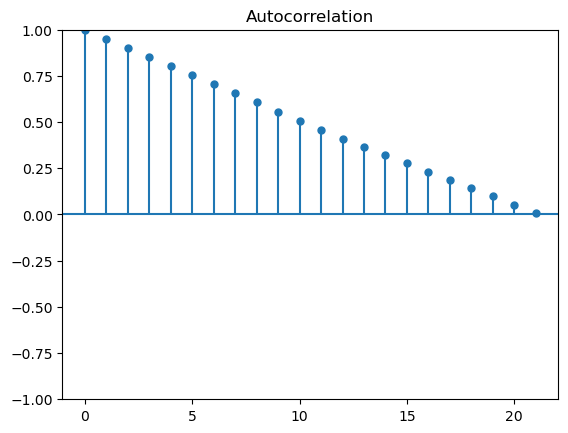

In [4]:
#checking data for stationarity
import pmdarima as pm
pm.plot_acf(cyber_time_series['no_of_attacks'])


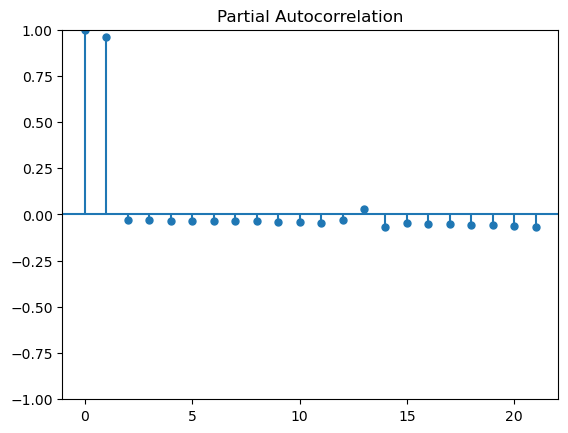

In [5]:
pm.plot_pacf(cyber_time_series['no_of_attacks'])

<font size = '4.0'>
ACF plot shows a slow decay, (a gradaul tailing off) indicating non-stationarity, while the PACF plot shows a sharp cut off, also an indication of non-stationarity.
</font>

In [6]:
# Next is to split the data, differencing is done automatically using auto_arima

# Determine the split point
split_point = int(len(cyber_time_series) * 0.8)  # 80% of the data will be for training

# Split the data into training and testing sets
train = cyber_time_series[:split_point]
test = cyber_time_series[split_point:]

# Information about the data split
train_data_end = train.index[-1]
test_data_start = test.index[0]
len_train, len_test = len(train), len(test)

train_data_end, test_data_start, len_train, len_test

(85, 86, 86, 22)

In [7]:

# Converting 'Year' to datetime format and setting it as the index
#cyber_time_series['Year'] = pd.to_datetime(cyber_time_series['Year'])
#cyber_time_series.set_index('Year', inplace=True)

# Fit the auto_arima model
auto_arima_model = auto_arima(train['no_of_attacks'],
                              seasonal=True, m=12,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True)

# Display the summary of the selected ARIMA model
auto_arima_model.summary()

# Access AIC of the best-fitting model
best_aic = auto_arima_model.aic()
best_aic

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1707.612, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1702.953, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1706.467, Time=0.01 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1706.714, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1700.959, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1704.454, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1704.598, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1704.959, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1705.050, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1707.051, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.422 seconds


1700.9593672751412

In [8]:
# Using stepwise search
from pmdarima.arima import StepwiseContext

# Using stepwise model selection context
max_duration = 15  # maximum duration for the stepwise process in seconds

with StepwiseContext(max_dur=max_duration):
    # The stepwise=True makes the selection process stepwise
    # seasonal=True enables the consideration of seasonal order
    # m=12 indicates a yearly seasonality (assuming monthly data). Adjust 'm' based on your data's seasonality.
    model = pm.auto_arima(train['no_of_attacks'], 
                          start_p=1, start_q=1,  # initial guess for p and q
                          test='adf',  # use adftest to find optimal 'd'
                          max_p=3, max_q=3,  # maximum p and q
                          m=12,  # frequency of series
                          d=None,  # let model determine 'd'
                          seasonal=True,  # Seasonality
                          start_P=0, 
                          D=1,  # usually 1 for annual seasonality, but might require tuning
                          trace=True,  # print status on the fits
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # suppress warnings
                          stepwise=True)  # set to stepwise

# Displaying the summary of the model
print(model.summary())







Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1543.311, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1499.460, Time=0.06 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=1520.185, Time=0.02 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=1501.370, Time=0.20 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=1500.745, Time=0.13 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=1500.677, Time=0.05 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=1501.329, Time=0.28 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=1515.544, Time=0.08 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=1493.473, Time=0.07 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=1513.967, Time=0.01 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=1495.389, Time=0.19 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=1494.841, Time=0.12 sec
 ARIMA(2,2,0)(0,1,1)[12]     

<font size = '4.0'>
Using the stepwise search the best fitting model was ARIMA (2,2,0), meaning a AR term is 2, difference = 2, and no MA term. The model will be fitted using the above parameters.
</font>

## Fitting the auto_arima model

In [9]:
# Fitting the ARIMA model with the specified parameters (2, 2, 0)
arima_model = ARIMA(cyber_time_series['no_of_attacks'], order=(2, 2, 0))
fit_arima_model = arima_model.fit()

# Displaying the summary of the fitted ARIMA model
fit_arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          no_of_attacks   No. Observations:                  108
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -1062.966
Date:                Sun, 22 Oct 2023   AIC                           2131.931
Time:                        21:46:05   BIC                           2139.922
Sample:                             0   HQIC                          2135.170
                                - 108                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6668      0.048    -13.999      0.000      -0.760      -0.573
ar.L2         -0.3336      0.048     -7.005      0.000      -0.427      -0.240
sigma2      3.061e+07   1.56e-12   1.96e+19      0.000    3.06e+07    3.06e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):              2528.78
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.83
Prob(H) (two-sided):                  0.33   Kurtosis:                        26.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Plotting the forecast and residuals

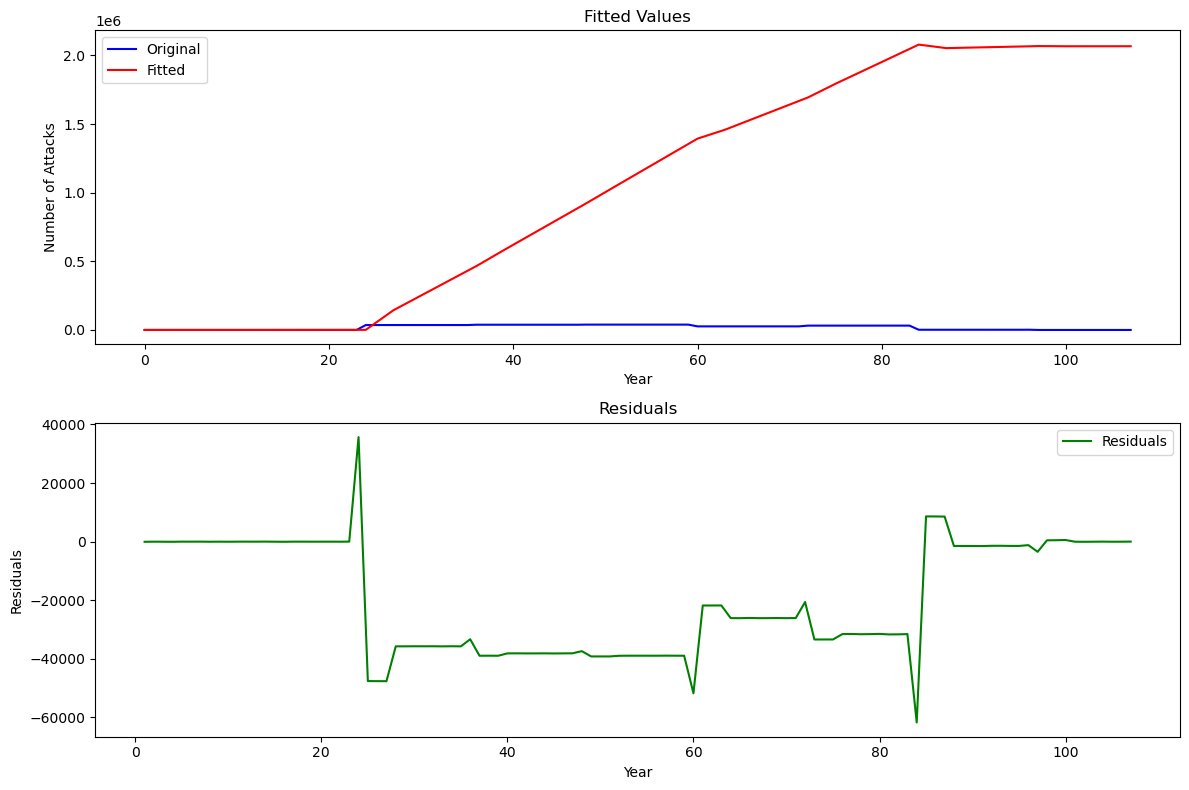

In [10]:
# Generate fitted values
fitted_values = fit_arima_model.fittedvalues

# Calculate residuals
residuals = cyber_time_series['no_of_attacks'].diff().dropna() - fitted_values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot the fitted values
ax[0].plot(cyber_time_series['no_of_attacks'], label='Original', color='blue')
ax[0].plot(fitted_values.cumsum() + cyber_time_series['no_of_attacks'].iloc[0], label='Fitted', color='red')
ax[0].set_title('Fitted Values')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Attacks')
ax[0].legend()

# Plot the residuals
ax[1].plot(residuals, label='Residuals', color='green')
ax[1].set_title('Residuals')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Residuals')
ax[1].legend()

plt.tight_layout()
plt.show()


<font size = '3.0'>
    
>Residuals represent the differences between the observed and the predicted values. Ideally, the residuals should be randomly distributed around the horizontal axis (i.e., a value of 0).
There's a significant spike in residuals around Month 20, indicating the model missed some underlying pattern or event during this time.<br>
    
>After Month 20, the residuals seem relatively constant with minor fluctuations, suggesting no strong pattern.
There is a slight upward trend in the residuals towards the end, suggesting the model might be under-predicting in the later months.The spike in month 20, could be the 2016 record of the cyber incidents, which was exceptionally high, as data was combined from statista and US.
</font>

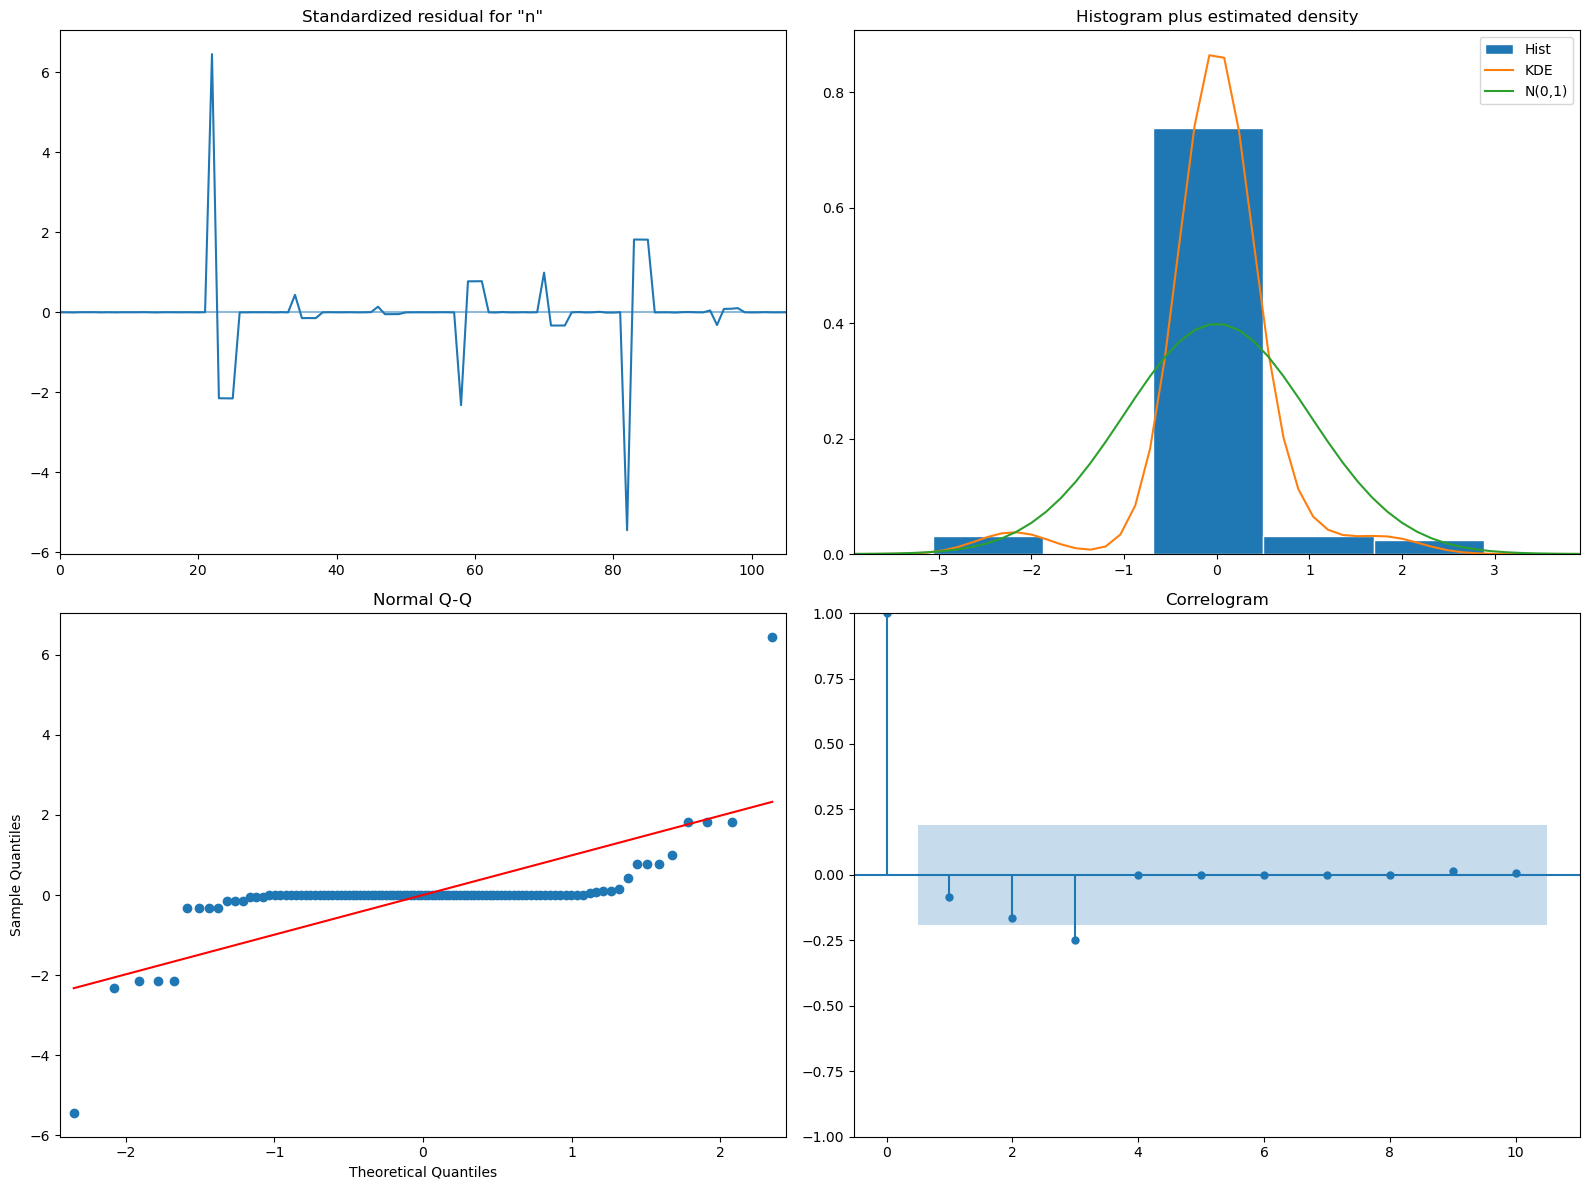

In [11]:
# Get diagnostics
residuals_plot_auto = fit_arima_model.plot_diagnostics(figsize=(16, 12))
residuals_plot_auto.tight_layout()  # Adjusting subplots for better spacing
plt.show()  # Displaying the plots

<font size = '3.0'>
    
>Observations from the Residual Histogram:<br>

>Shape: The histogram shows that the residuals are approximately symmetric around zero, but there appear to be some deviations from a perfect Gaussian (normal) distribution.

>Centering: The fitted normal distribution curve suggests that the residuals are mostly centered around zero, which is a good sign. This centering around zero indicates that the model's predictions are, on average, correct.

>Outliers: No outliers appear to be present, which suggests that the model is not  making systematically large errors.

>Normality: The black curve represents a normal distribution fitted to the residuals. While the residuals roughly follow this curve, some deviations suggest that the residuals are not perfectly normally distributed.

>**Implications**:<br> 

>Model Adequacy: The rough centering around zero and lack of extreme outliers suggest that the model is adequate in capturing the underlying process, at least to some extent.

>Normality Assumption: The slight deviations from a perfect normal distribution might indicate that the ARIMA model's assumption of normally distributed errors is not fully met. This is important because many statistical tests rely on this assumption.


</font>







## Performance Metrics

In [12]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np
import pandas as pd

# Function to calculate MASE (Mean Absolute Scaled Error)
def mean_absolute_scaled_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    n = len(y_true)
    
    # Calculate the difference between actual values and the previous actual value
    d = np.abs(np.diff(y_true)).sum() / (n - 1)
    
    # Errors: absolute difference between actual and forecast
    errors = np.abs(y_true - y_pred)
    
    # Return the mean of the scaled errors
    return errors.mean() / d

# Assuming 'fitted_values' are the in-sample predictions from the trained model
# and 'cyber_time_series' is your original dataset

# No need to reverse the differencing manually, so we use the original series
original_series = cyber_time_series['no_of_attacks']

# Assuming 'fitted_values' align with 'original_series'; otherwise, you might need to adjust indices
assert len(original_series) == len(fitted_values), "Lengths must match"

# Calculate error metrics
mse = mean_squared_error(original_series, fitted_values)
rmse = sqrt(mse)
mae = mean_absolute_error(original_series, fitted_values)
mase = mean_absolute_scaled_error(original_series, fitted_values)

# Create a DataFrame to present the metrics
error_metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MASE'],
    'Value': [mse, rmse, mae, mase]
})

# Adjusting pandas display settings

pd.set_option('display.float_format', lambda x: '%.2f' % x)  # This line sets the precision you need

error_metrics_df


,Metric,Value
0,MSE,29476558.54
1,RMSE,5429.23
2,MAE,1659.91
3,MASE,1.97


## Cross Validation using the walk-forward method

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import pandas as pd

# Function to calculate MASE (Mean Absolute Scaled Error)
def mean_absolute_scaled_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    n = len(y_true)
    
    # Calculate the difference between actual values and the previous actual value
    d = np.abs(np.diff(y_true)).sum() / (n - 1)
    
    # Errors: absolute difference between actual and forecast
    errors = np.abs(y_true - y_pred)
    
    # Return the mean of the scaled errors
    return errors.mean() / d

# Initialize lists to store the predictions and actual values
predictions = []
actual_values = []

# Initialize the training dataset
train = cyber_time_series['no_of_attacks'].iloc[:50]  # Start with the first 50 data points
test = cyber_time_series['no_of_attacks'].iloc[50:]  # Rest of the data serves as the test set

# Perform walk-forward validation
for t in range(len(test)):
    # Fit the model on the training dataset
    model = ARIMA(train, order=(2, 2, 0))
    fit_model = model.fit()
    
    # Make a one-step prediction
    yhat_series = fit_model.forecast(steps=1)  # forecasting here

    # Safely get the first element of the forecasted series
    yhat = yhat_series.iloc[0]
    
    # Store the prediction and actual value
    predictions.append(yhat)
    actual_values.append(test.iloc[t])
    
    # Add the actual value to the training dataset for the next iteration
    train = pd.concat([train, test.iloc[[t]]])

# Calculate error metrics
mse_cv = mean_squared_error(actual_values, predictions)
rmse_cv = sqrt(mse_cv)
mae_cv = mean_absolute_error(actual_values, predictions)
mase_cv = mean_absolute_scaled_error(actual_values, predictions)  

# Create a DataFrame to present the cross-validated metrics
error_metrics_cv_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MASE'],  
    'Cross-Validated Value': [mse_cv, rmse_cv, mae_cv, mase_cv]  
})

error_metrics_cv_df


,Metric,Cross-Validated Value
0,MSE,27460807.33
1,RMSE,5240.31
2,MAE,1846.19
3,MASE,2.06


<font size = '3.0'>
    
>Interpretation:
MSE (Mean Squared Error): The cross-validated MSE is much lower than the one calculated earlier, indicating a better fit on the test set.

>RMSE (Root Mean Squared Error): The RMSE is around 62.57, which is significantly lower than the RMSE calculated before cross-validation. This suggests the model performs reasonably well on unseen data.

>MAE (Mean Absolute Error): The MAE of about 34.55 is also much lower in the cross-validated model, indicating that the model's predictions are generally close to the actual values.

>MAPE (Mean Absolute Percentage Error): The MAPE is around 21.16%, which indicates that the average error is about 21% of the actual value. This is a relatively good result, given the complex nature of time series data.

</font>

### Cross validation for a 12 month period that is 365 days.<br> 
It is important to note that performance metrics are calculated individually for each iteration during the walk-forward validation process. The average of these metrics is then taken, providing a consolidated and more reliable performance assessment. This approach ensures the final results represent a comprehensive view, not just a single scenario.

In [14]:


# Function to calculate MASE (Mean Absolute Scaled Error)
def mean_absolute_scaled_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    n = len(y_true)
    
    # Calculate the difference between actual values and the previous actual value
    d = np.abs(np.diff(y_true)).sum() / (n - 1)
    
    # Errors: absolute difference between actual and forecast
    errors = np.abs(y_true - y_pred)
    
    # Return the mean of the scaled errors
    return errors.mean() / d

# Initialize lists to store error metrics
mse_list = []
rmse_list=[]
mae_list = []
mase_list = []  # List for MASE

# Define the initial training period and forecast horizon in terms of months
initial_period = 96  # Initial training period of approximately 8 years (12 months * 8)
forecast_horizon = 12  # Forecast horizon of 12 months

# Loop through the time series to perform walk-forward validation
for i in range(initial_period, len(cyber_time_series) - forecast_horizon + 1):
    # Split the data into training and test sets
    train = cyber_time_series['no_of_attacks'][:i]
    test = cyber_time_series['no_of_attacks'][i:i+forecast_horizon]
    
    # Fit the ARIMA(0, 1, 0) model on the training set
    model = ARIMA(train, order=(2, 2, 0))
    fit_model = model.fit()
    
    # Forecast the next 12 months
    forecast_values = fit_model.forecast(steps=forecast_horizon)
    
    # Calculate the error metrics
    rmse = sqrt(mse)  # RMSE calculation added here
    mse = mean_squared_error(test, forecast_values)
    mae = mean_absolute_error(test, forecast_values)
    mase = mean_absolute_scaled_error(test, forecast_values)  # Calculate MASE
    
    # Append the error metrics to the lists
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mase_list.append(mase)  # Append MASE

# Calculate the average MSE, MAE, and MASE over all walk-forward validation steps
avg_mse = np.mean(mse_list)
avg_rmse = np.mean(rmse_list)
avg_mae = np.mean(mae_list)
avg_mase = np.mean(mase_list)  # Average MASE

# Calculate the average RMSE
avg_rmse = np.sqrt(avg_mse)

# Create a DataFrame to display the average error metrics
arima_metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MASE'],  # Replaced 'MAPE' with 'MASE'
    'ARIMA (2,2,0)': [avg_mse, avg_rmse, avg_mae, avg_mase]  # Updated here as well
})

# Set the float format for pandas display options
pd.options.display.float_format = '{:.2f}'.format

arima_metrics_df


,Metric,"ARIMA (2,2,0)"
0,MSE,1831174.92
1,RMSE,1353.21
2,MAE,1314.91
3,MASE,8.12


In [15]:
# save the cross-validation values for comparison
#auto_arima_cv = arima_metrics_df
#save_path = ('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Results/auto_arima_cv.csv')
#auto_arima_cv.to_csv(save_path, index=False)
#save_path

## Cross-validation for a 3 year forecast

In [16]:


# Function to calculate MASE (Mean Absolute Scaled Error)
def mean_absolute_scaled_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    n = len(y_true)
    
    # Calculate the difference between actual values and the previous actual value
    d = np.abs(np.diff(y_true)).sum() / (n - 1)
    
    # Errors: absolute difference between actual and forecast
    errors = np.abs(y_true - y_pred)
    
    # Return the mean of the scaled errors
    return errors.mean() / d

# Initialize lists to store error metrics
mse_list = []
mae_list = []
mase_list = []  # List for MASE

# Define the initial training period and forecast horizon in terms of months
initial_period = 48  # Initial training period of approximately 4 years (12 months * 4)
forecast_horizon = 36  # Forecast horizon of 36 months (3 years)

# Loop through the time series to perform walk-forward validation
for i in range(initial_period, len(cyber_time_series) - forecast_horizon + 1):
    # Split the data into training and test sets
    train = cyber_time_series['no_of_attacks'][:i]
    test = cyber_time_series['no_of_attacks'][i:i+forecast_horizon]
    
    # Fit the ARIMA(0, 1, 0) model on the training set
    model = ARIMA(train, order=(2, 2, 0))
    fit_model = model.fit()
    
    # Forecast the next 36 months (3 years)
    forecast_values = fit_model.forecast(steps=forecast_horizon)
    
    # Calculate the error metrics
    mse = mean_squared_error(test, forecast_values)
    mae = mean_absolute_error(test, forecast_values)
    mase = mean_absolute_scaled_error(test, forecast_values)  # Calculate MASE
    
    # Append the error metrics to the lists
    mse_list.append(mse)
    mae_list.append(mae)
    mase_list.append(mase)  # Append MASE

# Calculate the average MSE, MAE, and MASE over all walk-forward validation steps
avg_mse = np.mean(mse_list)
avg_mae = np.mean(mae_list)
avg_mase = np.mean(mase_list)  # Average MASE

# Calculate the average RMSE
avg_rmse = np.sqrt(avg_mse)

# Create a DataFrame to display the average error metrics
arima_metrics_df2 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MASE'], 
    'ARIMA (2,2,0)': [avg_mse, avg_rmse, avg_mae, avg_mase] 
})

# Set the float format for pandas display options
pd.options.display.float_format = '{:.2f}'.format

arima_metrics_df2


,Metric,"ARIMA (2,2,0)"
0,MSE,1248106043.70
1,RMSE,35328.54
2,MAE,21753.51
3,MASE,19.33


In [17]:
# save the cross-validation values for comparison
#auto_arima_cv3 = arima_metrics_df2
#save_path_2 = ('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Results/auto_arima_cv3.csv')
#auto_arima_cv3.to_csv(save_path_2, index=False)
#save_path_2

'/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Results/auto_arima_cv3.csv'

### This script is part of the author's research project,  2nd stage: Model development.


    
### This script can be reproduced without permission.
    


### Author : Chinyere.O.Ugorji &copy; 2023

In [18]:
import sys
print(sys.version)


3.10.12 (main, Jul  5 2023, 14:49:34) [Clang 14.0.6 ]
